# Face Classification

In [ ]:
from fastai.core import *
from fastai.vision import *
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01a import *
from kgl_deepfake.nb_02a import *
from kgl_deepfake.nb_03 import *

### Data

In [ ]:
ls ../data

dfdc_train_part_0/  dfdc_train_part_1/  models/  train_sample_faces/


In [ ]:
ls ../data/dfdc_train_part_1 | wc -l

1684


In [ ]:
SOURCE = Path('../data/')

In [ ]:
src = ImageList.from_folder(SOURCE).split_by_folder(train='dfdc_train_part_0', valid='train_sample_faces')

In [ ]:
lab = r'([A-Z]+).png$'

In [ ]:
bs, sz = 32, 128

In [ ]:
def get_data(bs,size):
    data = (src.label_from_re(lab)
           .transform(get_transforms(), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [ ]:
data = get_data(bs, sz)

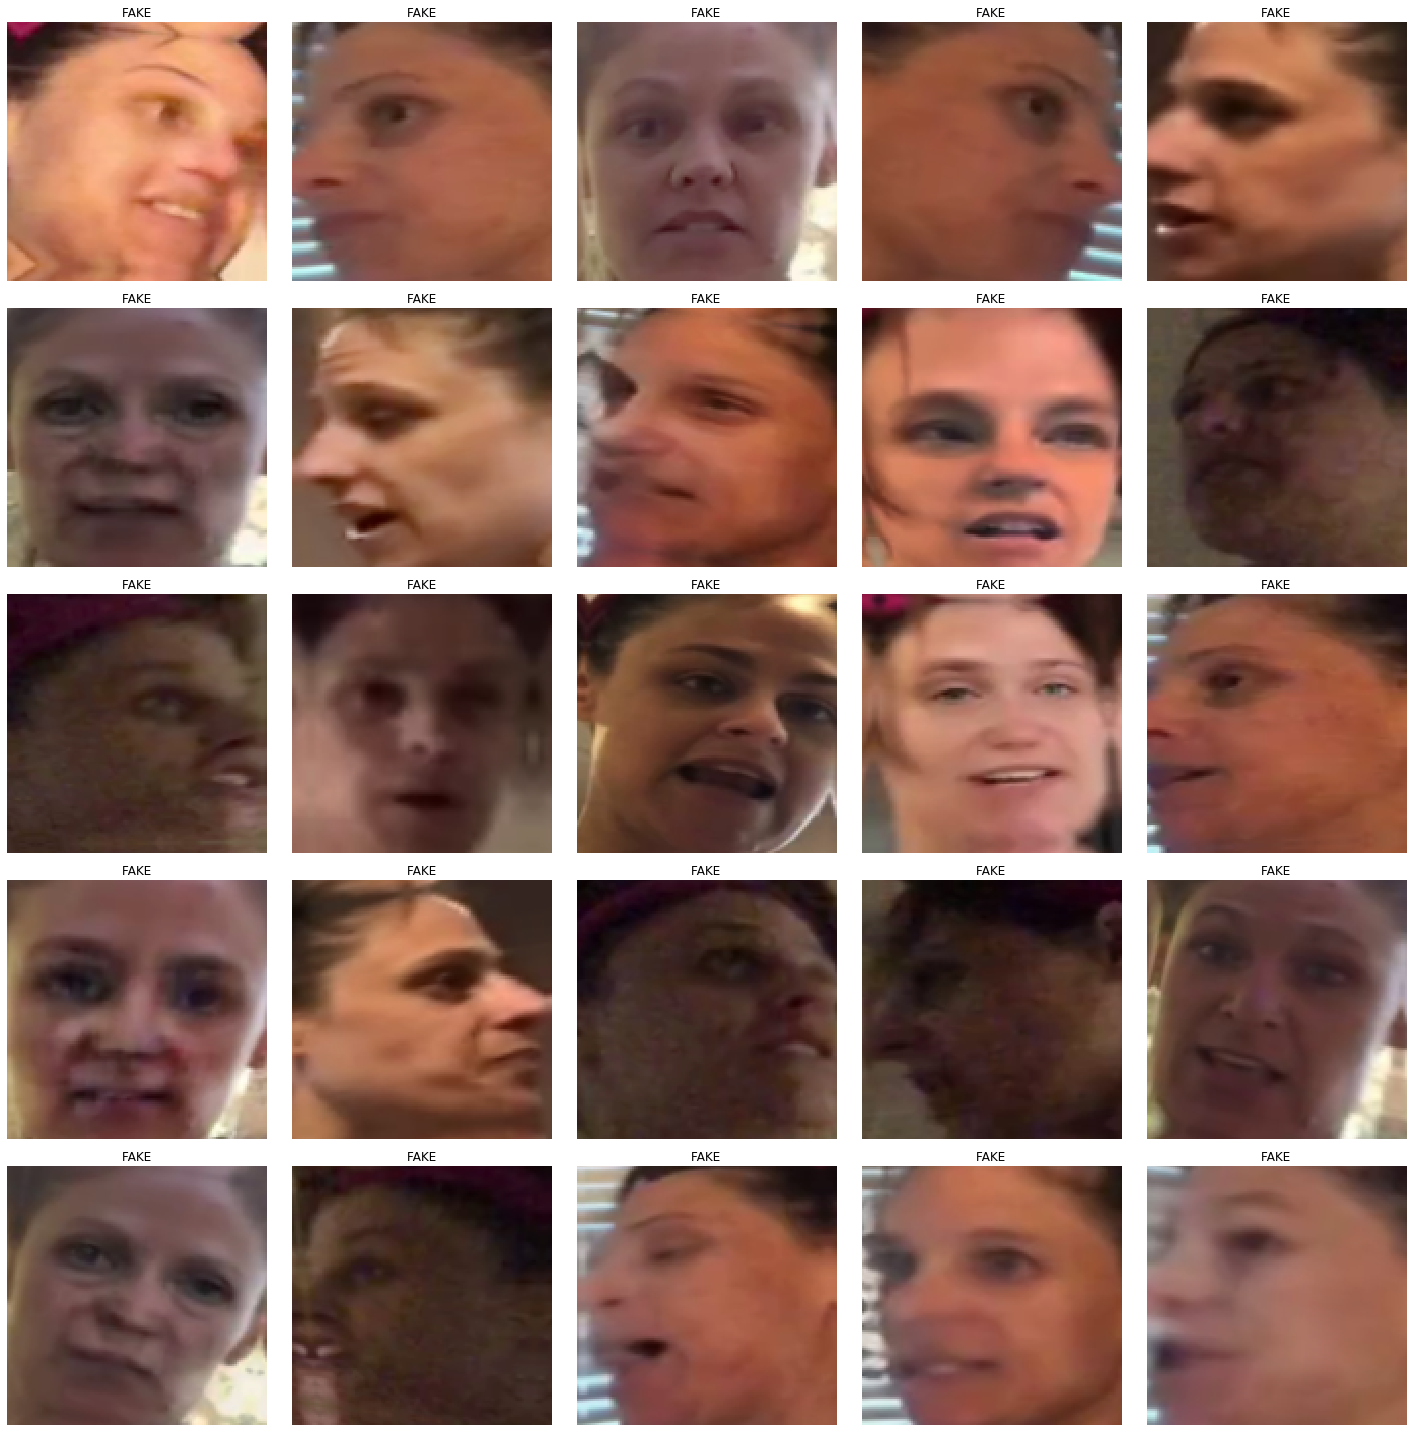

In [ ]:
data.show_batch()

### Model

In [ ]:
net = MesoNet()

In [ ]:
learn = Learner(data, net, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


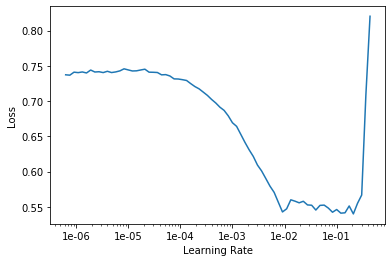

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
epochs, lr = 10, 3e-3

In [ ]:
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.473833,0.544646,0.797368,00:01
1,0.362041,0.646698,0.802632,00:01
2,0.321101,0.601338,0.802632,00:01
3,0.311224,0.614218,0.802632,00:01
4,0.287048,0.638746,0.802632,00:01
5,0.287750,0.651285,0.792105,00:01
6,0.270914,0.601974,0.800000,00:01
7,0.262928,0.597214,0.802632,00:01
8,0.259749,0.596773,0.800000,00:01
9,0.266081,0.634328,0.800000,00:01


80% of accuracy seems impressive ! But let's take a look at the results...

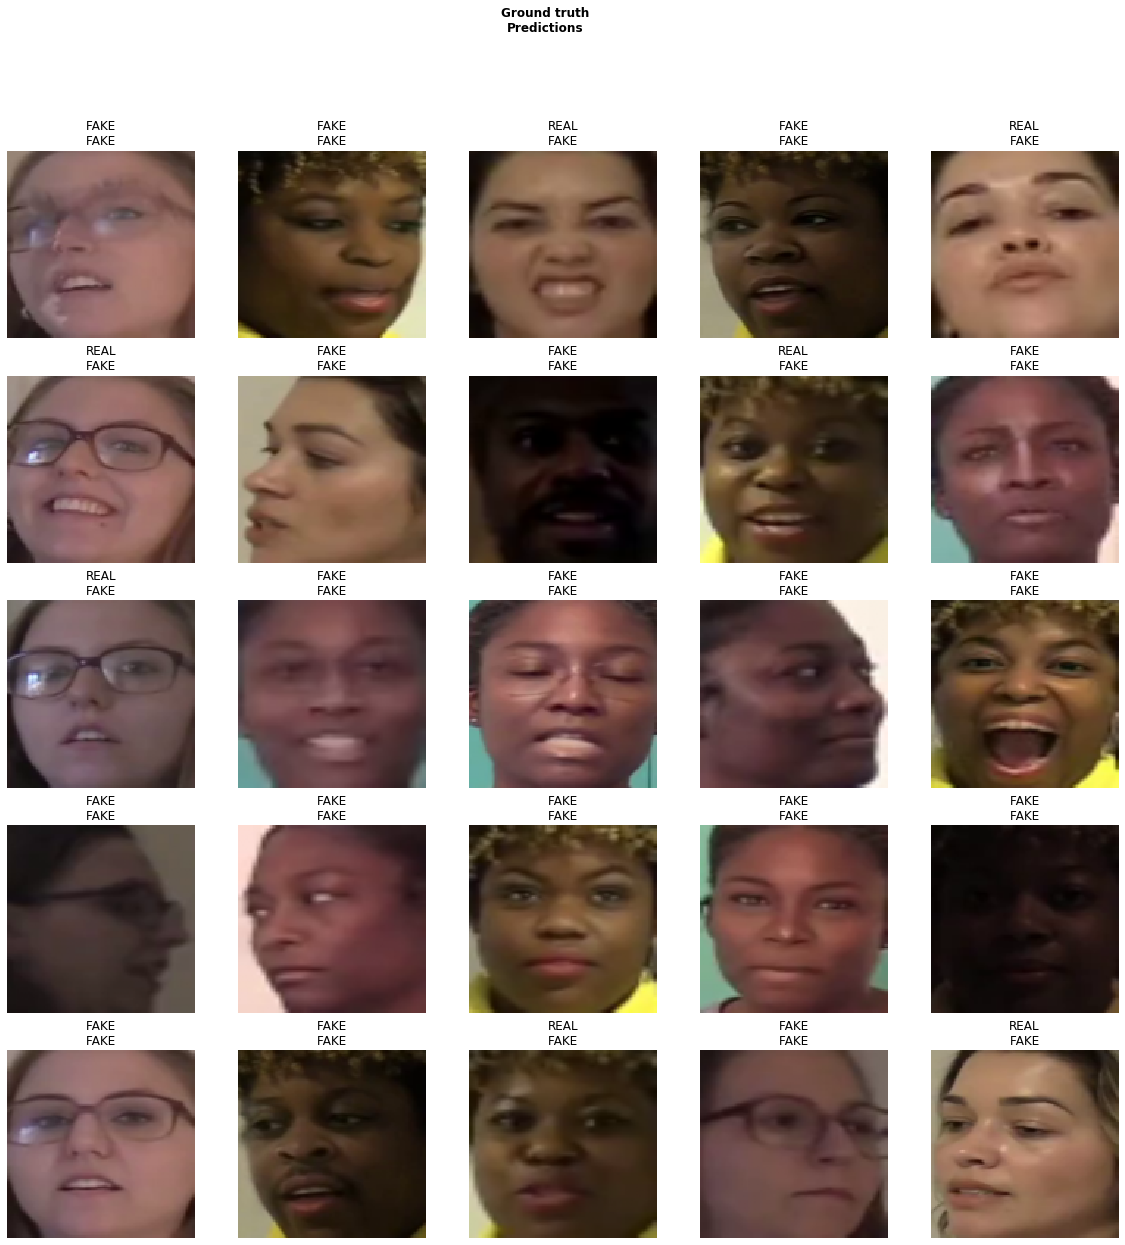

In [ ]:
learn.show_results()

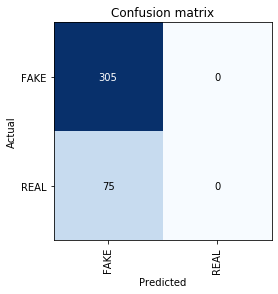

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

So it seems like our classifier is very lazy and predicts that the face is a fake one all the time. This is due to the imbalance in the number of sample per class. Indeed, as the FAKE faces are way more represented than the REAL ones, the easiest way to optimize rapidly for a good loss is to predict that the face is FAKE all the time. 